<img src='simplelinesrreg.png' />

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Original Raw Data
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


In [4]:
df['total_adv'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.drop(['TV','radio','newspaper'], axis =1)

,sales,total_adv
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000
...,...,...
195,7600,55700
196,9700,107200
197,12800,192700
198,25500,391800


In [6]:
X = df[['total_adv']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=77)
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

LinearRegression()

In [7]:
print(slr_model.intercept_)
print(slr_model.coef_)

4389.814518436082
[0.04784052]


In [8]:
#Training data  Accuracy 

sales_pred_train = slr_model.predict(X_train)
mse = mean_squared_error(y_train,sales_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,sales_pred_train)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 2628
R-squared: 0.7426281082244577


In [9]:
#Testing Data Accuracy 
sales_pred_test = slr_model.predict(X_test)
mse = mean_squared_error(y_test,sales_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,sales_pred_test)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 2423
R-squared: 0.7868779454628924


In [10]:
#Calculating cross validation matrics

scores = cross_val_score(slr_model,X,y,cv=5)
#print(scores)
print('Cross Validation :', scores.mean())


Cross Validation : 0.7433783178555419


<h3>Assumptions for Linear Regression</h3>

In [11]:
#Linerity of Errors 

y_pred_test = slr_model.predict(X_test)
error_test = y_test - y_pred_test


print(error_test.skew())



0.1772924273531572


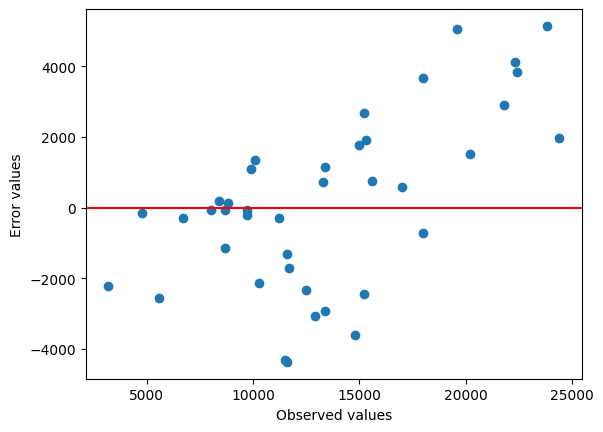

In [12]:
# Variance of Errors 
plt.scatter(y_test,error_test)
plt.axhline(y=0,color='red')
plt.xlabel('Observed values')
plt.ylabel('Error values')
plt.show()

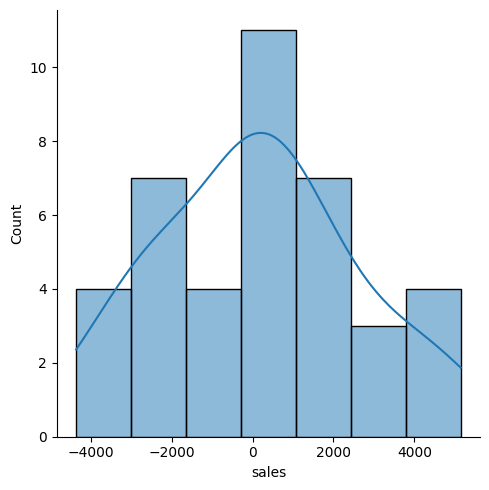

In [13]:
# Normality of Errors 
sns.displot(error_test,kde=True)
plt.show()

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming you have defined your X_train and y_train
# Create a DataFrame from your training data
#data = pd.concat([X_train, y_train], axis=1)

# Fit an OLS regression model
smf_model = smf.ols(formula='y~X', data=df).fit()

# Print the model summary
print(smf_model.summary())

ModuleNotFoundError: No module named 'statsmodels'

H0 -  Average line is the best line <br>
H1 -  Regression line is the best line <br>

P value of 5.06e-62 is close to zero and < 0.05(error) Here P low Null go…I.e H1 is accepted.
That is why R2 value value is +ve  <br>

If p> alpha then R2 will be -ve. I.e regression line is rejected and average line is the best line. <br>

sales = 0.0478(total_adv) + 4389.8145 <br>

total_adv on  x-axis <br>
sales on Y-axis <br>

if total_adv is zero then sales is 4389.8145 <br>
if total_adv is 1 then sales is 4389.8623 <br>
if total_adv is 10000 then sales is 4867.8145         4867.8145-4389.8145= 478 <br>

i.e with a increment of 10000$ on ads a sale of 478 units will be increased.


<h3> Checking with polynomial Regression </h3>

In [17]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree = 2, include_bias= False)
X_poly = polynomial_converter.fit_transform(X)
X_poly = pd.DataFrame(X_poly)

Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly, y, train_size=0.8, random_state=77)


#Xp_train = pd.DataFrame(polynomial_converter.fit_transform(X_train))
#Xp_test = pd.DataFrame(polynomial_converter.fit_transform(X_test))

In [18]:
X.head()

,total_adv
0,337100
1,128900
2,132400
3,251300
4,250000


In [19]:
X_poly.head()

,0,1
0,337100.0,1.136364e+11
1,128900.0,1.661521e+10
2,132400.0,1.752976e+10
3,251300.0,6.315169e+10
4,250000.0,6.250000e+10


In [20]:
pr_model = LinearRegression()
pr_model.fit(Xp_train, yp_train)

LinearRegression()

In [21]:
pr_model.intercept_

np.float64(4749.626309816085)

In [23]:
pr_model.coef_

array([4.34928983e-02, 1.04754623e-08])

In [24]:
#Training data  Accuracy 

sales_pred_train2 = pr_model.predict(Xp_train)
mse = mean_squared_error(yp_train,sales_pred_train2)
rmse = np.sqrt(mse)
r2 = r2_score(yp_train,sales_pred_train2)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 2626
R-squared: 0.7429435351040903


In [25]:
#Testing Data Accuracy 
sales_pred_test2 = pr_model.predict(Xp_test)
mse = mean_squared_error(yp_test,sales_pred_test2)
rmse = np.sqrt(mse)
r2 = r2_score(yp_test,sales_pred_test2)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 2426
R-squared: 0.7862795664854056


In [26]:
#Calculating cross validation matrics

scores2 = cross_val_score(pr_model,X_poly,y,cv=5)
print('Cross Validation :', scores2.mean())

Cross Validation : 0.7393251760669544


===================================================== <br>
with simple linear reg  Cross Validation : 0.7433783178555419 <br>

with degree 2 Cross Validation : 0.7393251760669544 <br>

with degree 3 Cross Validation : 0.7361651498825139 <br>

with degree 4 Cross Validation : 0.7218004396361231 <br>

In [24]:
sales_pred = pr_model.predict(polynomial_converter.fit_transform([[200000]]))
print(sales_pred)

[13867.22446269]


In [27]:
sales_pred = slr_model.predict([[200000]])
print(sales_pred)

[13957.91946809]


/Users/durgaprasad/Desktop/_WEEKEND/DAY1-Python-Flask/basicpythonenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<h1> Hence Simple linear regression is best Model <h1>